In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
print("OpenCV version:")
print(cv2.__version__)

OpenCV version:
4.5.3


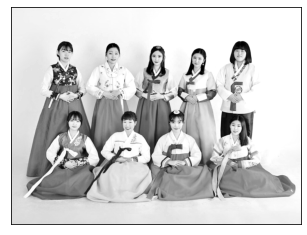

In [3]:
image = cv2.imread('./123.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
xml = 'haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(xml)
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

print("Number of faces detected: " + str(len(faces)))

Number of faces detected: 8


In [5]:
faces

array([[477, 153,  53,  53],
       [618, 161,  52,  52],
       [762, 135,  54,  54],
       [325, 142,  58,  58],
       [541, 378,  59,  59],
       [750, 392,  53,  53],
       [193, 376,  53,  53],
       [376, 379,  54,  54]], dtype=int32)

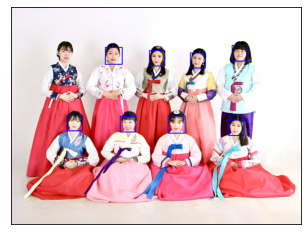

In [6]:
if len(faces):
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

Number of faces detected: 8


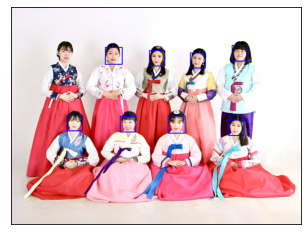

In [7]:
image = cv2.imread('./123.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

xml = 'haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(xml)
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

print("Number of faces detected: " + str(len(faces)))

if len(faces):
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [8]:
## -*- coding: utf-8 -*-  # 한글 주석쓸려면 적기

font = cv2.FONT_ITALIC
 
def faceDetect():
    eye_detect = False
    face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")  # 얼굴찾기 haar 파일
    eye_cascade = cv2.CascadeClassifier("./haarcascade_eye.xml") # 눈찾기 haar 파일
 
    try:
        cam = cv2.VideoCapture(0)
    except:
        print("camera loading error")
        return
 
    while True:
        ret, frame = cam.read()
        if not ret:
            break
 
        if eye_detect:
            info = "Eye Detention ON"
        else:
            info = "Eye Detection OFF"
 
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3, 5)
 
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
 
        #카메라 영상 왼쪽위에 위에 셋팅된 info 의 내용 출력
        cv2.putText(frame, info, (5,15), font, 0.5, (255,0, 255),1)
 
        for(x,y, w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)  #사각형 범위
            cv2.putText(frame, "Detected Face", (x-5, y-5), font, 0.5, (255,255,0),2)  #얼굴찾았다는 메시지
            if eye_detect:  #눈찾기
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = frame[y:y+h, x:x+w]
                eyes = eye_cascade.detectMultiScale(roi_gray)
                for (ex,ey,ew,eh) in eyes:
                    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
 
        cv2.imshow("frame", frame)
        k=cv2.waitKey(30)
 
        #실행 중 키보드 i 를 누르면 눈찾기를 on, off한다.
        if k == ord('i'):
            eye_detect = not eye_detect
        if k == 27:
            break
    cam.release()
    cv2.destroyAllWindows()
 
    faceDetect()

In [9]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'img' is not defined